<div style="border:solid lightseagreen 3px; padding: 20px">
<div>    
<p><font color="black" >
Привет! Меня зовут Мария Четырева, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». 
По ходу твоего решения я буду оставлять комментарии, обрати внимание на их цвет.</font></p>
</div>

<div class="alert alert-success">

<b>✔️</b> Зеленым цветом отмечены удачные и элегантные решения, на которые можно опираться в будущем.

</div>

<div class="alert alert-warning">

<b>⚠️</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Это не критичные ошибки, исправление которых остается на твое усмотрение. Однако постарайся, чтобы после твоих доработок их было не больше 3.

</div>

<div class="alert alert-danger">

<b>❌</b> Красным цветом отмечены критичные ошибки, без исправления которых проект не будет принят.

</div>

<p>Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:

<div class="alert alert-info">
<b>Комментарий студента:</b> Ок
<br>
</div>
    
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. </p>

</div>

<div style="border:solid lightseagreen 3px; padding: 20px">
<div>
<b>Общий комментарий ревьюера: </b>
    
   Прошу прощения за долгое ожидание проверки, у нас завал( Обещаю, что следующая итерация пройдет в срок.
    
   Мне очень понравилась твоя работа! Ты уверенно используешь pandas для анализа данных, верно формулируешь выводы. Критических замечаний нет. Отправляю работу, чтобы убедиться, что все мои комментарии понятны. Если же вопросов ко мне нет, присылай работу еще раз и я ее приму.


</div>
    


<img src="https://i.ibb.co/vZtG5zL/image.jpg" width=450 height=450 />

**Задача**  
Проанализировать поведение клиентов компании Мегалайн и сделать вывод — какой тариф выгоднее продвигать: Смарт или Ультра.
1. Провести первичный анализ данных
2. Провести предобработку данных (привести к нужным типам и исправить ошибки)
3. Добавить необходимые данные в таблицы (количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя)
4. Описать поведение клиентов (среднее кол-во сообщений, минут разговора, объем трафика)
5. Проверить гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

# Этап 1. Опишем наборы данных, получим их, импортируем библиотеки

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from datetime import datetime
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.1f}'.format)

In [2]:
# Подгрузим датасеты
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
### Изучим общую информацию по датафреймам и всем признакам, посмотрим на размер данных, 
### Оценим среднее, минимальное и максимальное для числовых значений методом describe()

print(calls.info())
print()
print(calls.describe())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

       duration   user_id
count 202,607.0 202,607.0
mean        6.8   1,253.9
std         5.8     144.7
min         0.0   1,000.0
25%         1.3   1,126.0
50%         6.0   1,260.0
75%        10.7   1,379.0
max        38.0   1,499.0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.9,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.2,1000


Столбец duration содержит нулевые значения. Согласно заданию, это неотвеченные звонки. Оставляем без изменений.

In [4]:
print(internet.info())
print()
print(internet.describe())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

       Unnamed: 0   mb_used   user_id
count   149,396.0 149,396.0 149,396.0
mean     74,697.5     370.2   1,252.1
std      43,127.1     278.3     144.1
min           0.0       0.0   1,000.0
25%      37,348.8     138.2   1,130.0
50%      74,697.5     348.0   1,251.0
75%     112,046.2     559.6   1,380.0
max     149,395.0   1,724.8   1,499.0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,"1,052.8",2018-09-07,1000
2,2,1000_2,"1,197.3",2018-06-25,1000
3,3,1000_3,550.3,2018-08-22,1000
4,4,1000_4,302.6,2018-09-24,1000


In [5]:
print(messages.info())
print()
print(messages.describe())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

        user_id
count 123,036.0
mean    1,257.0
std       143.5
min     1,000.0
25%     1,134.0
50%     1,271.0
75%     1,381.0
max     1,499.0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
print(users.info())
print()
print(users.describe())
users.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

       user_id   age
count    500.0 500.0
mean   1,249.5  46.6
std      144.5  16.7
min    1,000.0  18.0
25%    1,124.8  32.0
50%    1,249.5  46.0
75%    1,374.2  62.0
max    1,499.0  75.0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
print(tariffs.info())
print()
print(tariffs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

       messages_included  mb_per_month_included  minutes_included  \
count                2.0                    2.0               2.0   
mean               525.0               23,040.0           1,750.0   
std                671.8               10,861.2           1,767.8   
min                 50.0               15,360.0             500.0   
25%                287.5               19,200.0           1,125.0   
50%                525.0               23,040.0           1,750.0   
75%                

In [8]:
# Изменим название столбца на tariff (нам это пригодится, когда будем мерджить таблицы)
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
# users.groupby('tariff').agg(['count'])

**Вывод**  
- Обнаружен неверный формат даты во всех таблицах с датами (4шт)
- Необходимо округлить время звонков и мегабайты трафика в большую сторону в соответствии с условиями тарифов

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Отлично, с данными ознакомились

</div>

# Этап 2. Подготовка данных

### Приведём данные к нужным типам

Мы изучем данные для каждого тарифа в разрезе месяца, поэтому добавим столблец "month" в каждый датафрейм. Для этого вначале приведем даты к формату datetime.

In [9]:
# Изменим тип данных в колонке с датой в таблицах Звонки, Интернет, Сообщения и Клиенты:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Здорово, что приводишь типы данных

</div>

In [10]:
#добавляем столбец month в таблицах Звонки, Интернет и Сообщения:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

# messages['month'] = messages['message_date'].dt.month.astype('datetime64[M]')
# messages                                                                             

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Обычно в датафрейме содержатся данные нескольких лет - и тогда метод month может привести к ошибке: например, июнь 2019 и июнь 2020 могут стать одним месяцем. Стоит использовать метод astype('datetime64[M]').
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Мария, привет!  
Я не смогла разобраться как работает метод astype('datetime64[M]'):  
    
Если записать сл. образом:   
messages['month'] = pd.to_datetime(messages['message_date']).dt.month.astype('datetime64[M]')   
    или  
messages['month'] = messages['message_date'].dt.month.astype('datetime64[M]')  
У меня получается формат даты или 1970-07-01 или  2018-07-01
А мне для задания нужно числовое значение месяца.
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> Не вижу здесь ничего страшного. Просто все записи за декабрь 2018, к примеру, будут выглядеть как 2018-12-01, то есть объединение пройдет нормально. Если же тебе все же хочется обрезать лишнее число месяца, то есть еще один метод:
    
messages['month'] = pd.to_datetime(messages['message_date']).dt.to_period('M')
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_period.html
</div>

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Каждый звонок округлим отдельно.  
Для веб-трафика округляются не отдельные сессии, а общая сумма за месяц.

In [11]:
# округлим в большую сторону звонки
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Молодец, что используешь ceil! Однако, np.ceil не нуждается в apply, т.к. может работать сразу со всем столбцом.
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Исправила. Спасибо.
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

In [12]:
#в таблице с интернет-трафиком для дальнейшего анализа переведем мб в гб
internet['gb_used'] = (internet['mb_used'] / 1024)
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,113.0,2018-11-25,1000,11,0.1
1,1,1000_1,"1,052.8",2018-09-07,1000,9,1.0
2,2,1000_2,"1,197.3",2018-06-25,1000,6,1.2
3,3,1000_3,550.3,2018-08-22,1000,8,0.5
4,4,1000_4,302.6,2018-09-24,1000,9,0.3
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.9,2018-10-03,1499,10,0.3
149392,149392,1499_153,490.1,2018-12-14,1499,12,0.5
149393,149393,1499_154,0.0,2018-10-27,1499,10,0.0
149394,149394,1499_155,"1,246.3",2018-11-26,1499,11,1.2


### Посчитаем помесячную выручку для каждого пользователя:

Для этого рассчитаем и добавим в датафрейм:
* количество сделанных звонков и израсходованных минут разговора по месяцам;  
* количество отправленных сообщений по месяцам;  
* объем израсходованного интернет-трафика по месяцам;    

In [13]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам:
calls = calls.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()
calls.columns =  ['user_id', 'month', 'calls','minutes']

# Объем израсходованного интернет-трафика по месяцам:
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet.columns =  ['user_id', 'month', 'internet']

# Количество отправленных сообщений по месяцам
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages.columns =  ['user_id', 'month', 'messages']
display(calls.head(), internet.head(),messages.head())

,user_id,month,calls,minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


,user_id,month,internet
0,1000,5,"2,253.5"
1,1000,6,"23,233.8"
2,1000,7,"14,003.6"
3,1000,8,"14,055.9"
4,1000,9,"14,568.9"


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [14]:
# Посчитаем месячную выручку с каждого абонента. Для этого смерджим таблицы:

df = calls.merge(messages, on=['user_id','month'], how='outer')\
    .merge(internet, on=['user_id','month'], how='outer').fillna(0)

df = df.merge(users, on = 'user_id', how = 'left')\
    .merge(tariffs, left_on = 'tariff', right_on = 'tariff', how = 'left')
df.head()

,user_id,month,calls,minutes,messages,internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,"2,253.5",52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,"23,233.8",52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,"14,003.6",52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,"14,055.9",52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,"14,568.9",52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Молодец, ты правильно объединяешь таблицы! Но неплохо бы провести некоторые проверки правильности объединения: не потеряли ли мы пользователей, нет ли нескольких одинаковых комбинаций месяц-пользователь
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Добавила проверки
</div>

In [15]:
# Количество дубликатов в объединенной таблице
display('Количество дубликатов в объединенной таблице:', df.duplicated().sum())
# Проверим, не потеряли ли мы при объединении пользователей:
df.isna().sum()

'Количество дубликатов в объединенной таблице:'

0

user_id                     0
month                       0
calls                       0
minutes                     0
messages                    0
internet                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля 
* сообщение: 3 рубля; 
* 1 Гб интернет-трафика: 200 рублей.  

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль; 
* сообщение: 1 рубль; 
* 1 Гб интернет-трафика: 150 рублей.

In [16]:
# # Функция для подсчета значений сверх тарифа:
# def minutes_over_limit(raw):
#     if raw['tariff'] == 'smart':
#         if raw['minutes'] - 500 > 0:
#             return (raw['minutes'] - 500) * 3
#         return 0
#     else:
#         if raw['minutes'] - 3000 > 0:
#             return raw['minutes'] - 3000 * 1
#         return 0

# def messages_over_limit(raw):
#     if raw['tariff'] == 'smart':
#         if raw['messages'] - 50 > 0:
#             return (raw['messages'] - 50)*3
#         return 0
#     else:
#         if raw['messages'] - 1000 > 0:
#             return raw['messages'] - 1000
#         return 0   
# def mbs_over_limit(raw):
#     if raw['tariff'] == 'smart':
#         if raw['internet']/1000 - 15 > 0:
#             return (raw['internet']/1024 - 15)*200
#         return 0
#     else:
#         if raw['internet']/1000 - 30 > 0:
#             return (raw['internet']/1024 - 30)*150
#         return 0    


# Функция для подсчета значений сверх тарифа:
def minutes_over_limit(raw):
    if raw['minutes'] - raw['minutes_included']  > 0:
        return (raw['minutes'] - raw['minutes_included']) * raw['rub_per_minute']
    return 0
    
def messages_over_limit(raw):
    if raw['messages'] - raw['messages_included'] > 0:
        return (raw['messages'] - raw['messages_included'])* raw['rub_per_message']
    return 0
    
def mbs_over_limit(raw):
    if (raw['internet'] - raw['mb_per_month_included']) > 0:
        return (raw['internet']/1024 - raw['mb_per_month_included']/1024)* raw['rub_per_gb']
    return 0    
    
df['minutes_plus'] = df.apply(minutes_over_limit, axis = 1)  
df['messages_plus'] = df.apply(messages_over_limit, axis = 1)  
df['internet_plus'] = df.apply(mbs_over_limit, axis = 1)

# Общая выручка с каждого клиента, включая сверх-тариф и аб.плату:

df['total_pay'] = (df['minutes_plus'] + df['messages_plus'] + df['internet_plus'] + df['rub_monthly_fee'])
df[['minutes_plus','messages_plus','internet_plus','total_pay']].sort_values(by = 'total_pay', ascending = False)

,minutes_plus,messages_plus,internet_plus,total_pay
3106,"1,521.0",99.0,"4,529.8","6,699.8"
1622,"1,722.0",0.0,"3,377.1","5,649.1"
260,684.0,75.0,"4,258.9","5,567.9"
3105,792.0,138.0,"4,083.2","5,563.2"
1793,717.0,54.0,"3,857.0","5,178.0"
...,...,...,...,...
1642,0.0,0.0,0.0,550.0
1644,0.0,0.0,0.0,550.0
2167,0.0,0.0,0.0,550.0
829,0.0,0.0,0.0,550.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Лучше брать лимиты по тарифам и абонентскую плату прямо из таблицы, ссылаясь на ее ячейки. Тогда при изменении тарифных условий нам не придется переписывать наши функции
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Исправила. Спасибо.
</div>

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера v2:</b> 👍

</div>

**Вывод:**
Мы привели данные в единый датафрейм, с которым будем работать дальше. 

# Этап 3. Анализ данных

**Задача:**  
Описать поведение клиентов оператора, исходя из выборки. 
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Построим диаграммы размаха для каждого тарифа:

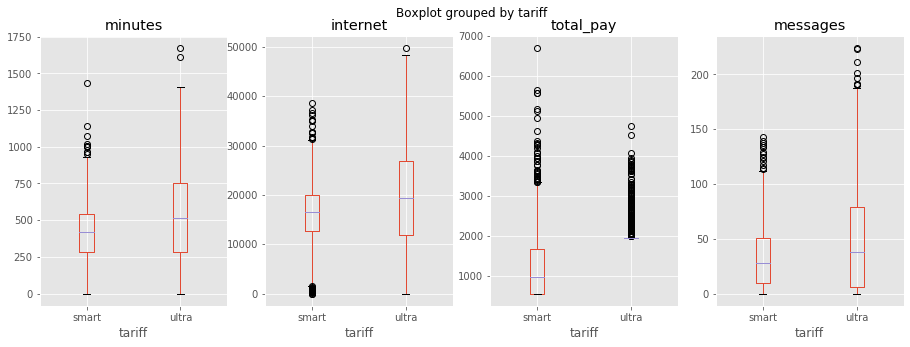

In [17]:
plt.subplots(figsize=(15, 5))
df.boxplot('minutes', by = 'tariff', ax=plt.subplot(1, 4, 1))
df.boxplot('internet', by = 'tariff', ax=plt.subplot(1, 4, 2))
df.boxplot('total_pay', by = 'tariff', ax=plt.subplot(1, 4, 3))
df.boxplot('messages', by = 'tariff', ax=plt.subplot(1, 4, 4))

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Еще интересно посмотреть на распределение минут и интернета, приобретенного сверх тарифа. Операторы заинтересованы в том, чтобы пользователь платил больше)
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Дополнила боксплотом и таблицей.
</div>

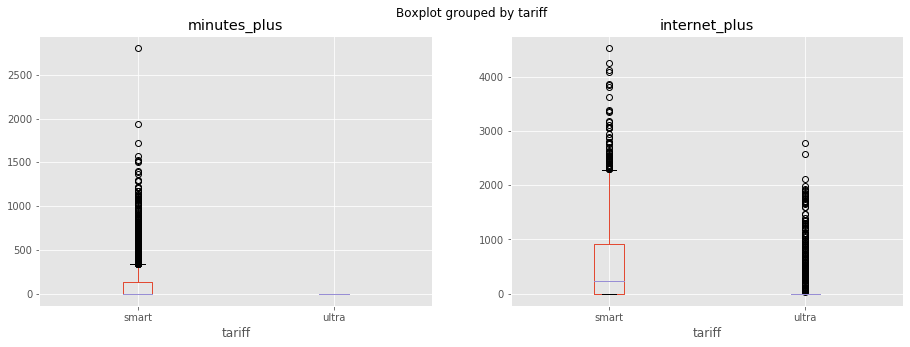

In [18]:
# Посмотрим на распределение минут и интернета, приобретенного сверх тарифа:
plt.subplots(figsize=(15, 5))
df.boxplot('minutes_plus', by = 'tariff', ax=plt.subplot(1, 2, 1))
df.boxplot('internet_plus', by = 'tariff', ax=plt.subplot(1, 2, 2));

In [19]:
# Посчитаем среднее и медианц для минут и интернета, приобретенного сверх тарифа:
df.groupby('tariff')['minutes_plus','internet_plus'].agg(['mean', 'median'])

minutes_plus        internet_plus       
               mean median          mean median
tariff                                         
smart         124.8    0.0         538.2  224.0
ultra           0.0    0.0         109.9    0.0

**Вывод:**   
Абоненты Смарт сверх тарифа приобретают в среднем 125 минут и 538 мбайт  
Абоненты Ультра сверх тарифа не приобретают минуты и в среднем 110 мбайт  

### Сравним средний чек в регионах для тарифов Смарт и Ультра:

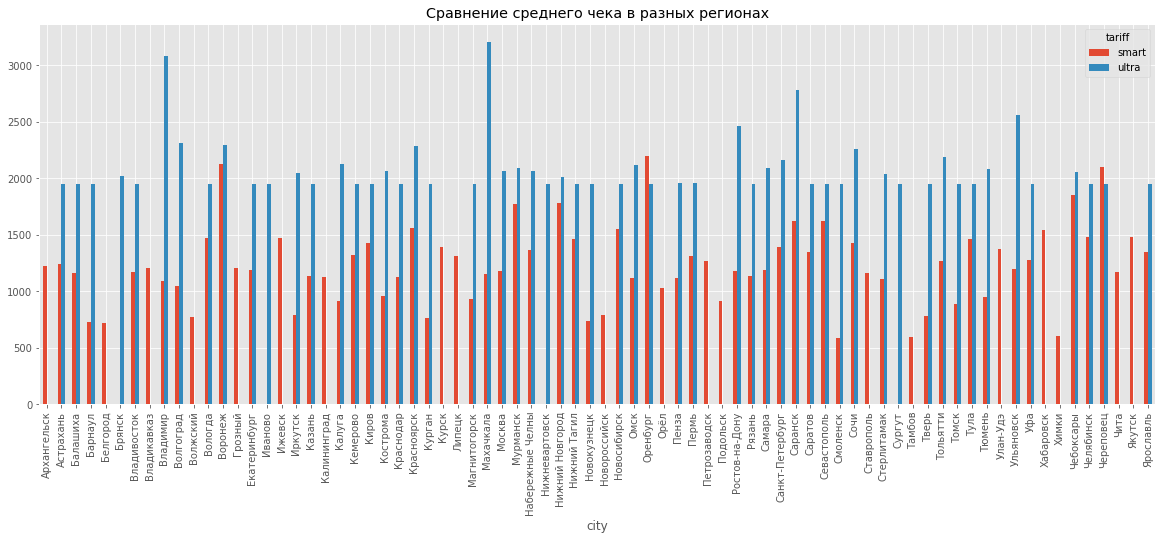

In [20]:
# Сравним средний  чек на тарифы Смарт и Ультра по регионам:
(df.pivot_table(index = 'city', columns = 'tariff', values = 'total_pay', aggfunc = 'mean')
    .plot(kind='bar', figsize=(20,7), title='Сравнение среднего чека в разных регионах')
)

Максимальный средний чек в тарифе Ультра делят Махачкала и Владимир. Интересный дуэт.  
Минимальный средний чек в тарифе Ультра практически равен среднему,  или абонентской плате. Распределение равномерное.  
Лидерами по максимальному среднему чеку в тарифе Смарт стали Воронеж, Оренбург, Череповец.  
Самые экономные в тарифе Смарт города Смоленск, Тамбов, Химки. 

tariff,smart,ultra
month,,
1,34,9
2,58,24
3,77,37
4,112,55
5,141,67
6,164,84
7,201,91
8,235,107
9,260,115


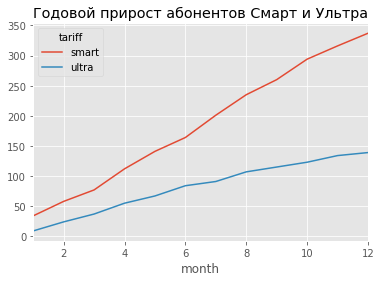

In [21]:
# Посмотрим, был ли рост количества абонентов в числовом и графическом выражении:
display(df.pivot_table(index = 'month', columns = 'tariff', values = 'user_id', aggfunc = 'count'));
(df.pivot_table(index = 'month', columns = 'tariff', values = 'user_id', aggfunc = 'count')
.plot(title='Годовой прирост абонентов Смарт и Ультра')
)

По графику видим, что количество абонентов в тарифе Смарт выросло за год почти в 10 раз, а в тарифе Ультра в 16 раз. 
Хорошие темпы роста.

### Посчитаем среднее, дисперсию и ст.отклонение для объема трафика, длительности звонков и кол-ва сообщений для каждого тарифа методом группировки

In [22]:
# Расчет для среднего чека:
df.groupby('tariff')['total_pay'].agg(['count', 'mean', 'std', 'min','median', 'max', 'sum','var']).round()

,count,mean,std,min,median,max,sum,var
tariff,,,,,,,,
smart,2229,"1,230.0",786.0,550.0,958.0,"6,700.0","2,742,656.0","617,357.0"
ultra,985,"2,060.0",355.0,"1,950.0","1,950.0","4,737.0","2,028,971.0","125,940.0"


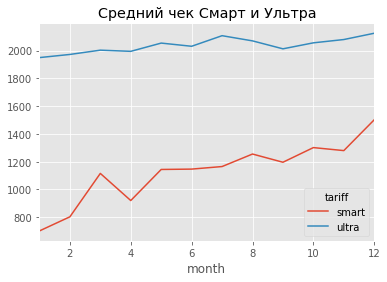

In [23]:
# График для среднего чека:
df.pivot_table(index = 'month', columns = 'tariff', values = 'total_pay', aggfunc = 'mean').plot(title='Средний чек Смарт и Ультра')

In [24]:
# Расчет для звонков:
df.groupby('tariff')['minutes'].agg(['count', 'mean', 'std', 'min','median', 'max', 'sum','var']).round()

,count,mean,std,min,median,max,sum,var
tariff,,,,,,,,
smart,2229,418.0,190.0,0.0,422.0,"1,435.0","931,577.0","36,219.0"
ultra,985,527.0,318.0,0.0,518.0,"1,673.0","518,724.0","100,874.0"


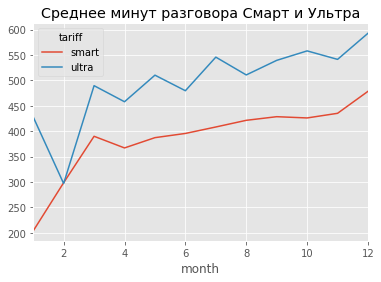

In [25]:
# Посмотрим на графике среднюю продолжительность вызвов в месяц для абонентов тарифов Смарт и Ультра:
df.pivot_table(index = 'month', columns = 'tariff', values = 'minutes', aggfunc = 'mean').plot(title='Среднее минут разговора Смарт и Ультра')

In [26]:
# Расчет для интернета:
df.groupby('tariff')['internet'].agg(['count', 'mean', 'std', 'min','median', 'max', 'sum','var']).round()

,count,mean,std,min,median,max,sum,var
tariff,,,,,,,,
smart,2229,"16,208.0","5,870.0",0.0,"16,507.0","38,552.0","36,128,495.0","34,462,496.0"
ultra,985,"19,469.0","10,087.0",0.0,"19,308.0","49,746.0","19,176,773.0","101,751,014.0"


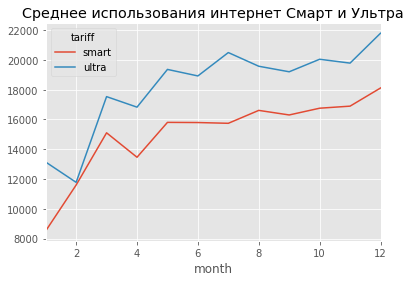

In [27]:
# Сравним, сколько в среднем использовали в месяц интернета абоненты Смарт и Ультра:
df.pivot_table(index = 'month', columns = 'tariff', values = 'internet', aggfunc = 'mean').plot(title='Среднее использования интернет Смарт и Ультра')

In [28]:
# Расчет для сообщений:
df.groupby('tariff')['messages'].agg(['count', 'mean', 'std', 'min','median', 'max', 'sum','var']).round()

,count,mean,std,min,median,max,sum,var
tariff,,,,,,,,
smart,2229,33.0,28.0,0.0,28.0,143.0,"74,413.0",797.0
ultra,985,49.0,48.0,0.0,38.0,224.0,"48,623.0","2,285.0"


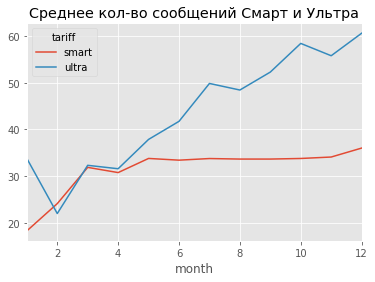

In [29]:
# Сравним, сколько в среднем требуется сообщений абонентам Смарт и Ультра:
df.pivot_table(index = 'month', columns = 'tariff', values = 'messages', aggfunc = 'mean').plot(title='Среднее кол-во сообщений Смарт и Ультра')

**Вывод**  

В тарифе "Смарт" среднее  месячного платежа равно 1,230.0 руб, стандартное отклонение = 786.1 руб.  
В тарифе «Ультра» среднее месячного платежа равно 2,059.3 руб, стандартное отклонение = 355.1 руб.  

Если сравнивать стандартное отклонение месячного платежа тарифов Смарт и Ультра, видим что абоненты тарифа Смарт переплачивают чаще и в 2 раза больше чем абоненты Ультра (786 руб. против 355 руб).   

Для абонентов тарифа Смарт переплата складывается за счет превышения лимитов:  
* Лимит за минуты разговора: отклонение сверх лимита 500 минут составляет ~ 108 минут ( среднеe = 418 мин. плюс стандартное отклонение = 190 мин.) 
* Лимит интернет - трафика: при среднем = 16208 mb и стандартном отклонении = 5870 mb., отклонение сверх лимита 15 Гб составляет ~ 6.5 Гб
* Лимит сообщений: при среднем = 33 и стандартном отклонении = 28, отклонение сверх лимита 50 сообщений составляет ~ 11 сообщений.  

Абонентам тарифа Ультра хватает установленных лимитов и переплачивают они намного реже пользователей Смарт. 

Интренет -трафик плавно растет в обоих тарифах в течении года и к концу года пользователи обоих тарифов удваивают потребление. 

Видим готовность абонента платить больше за стабильный и высокоскоростной интернет 

На всех графиках (минуты, интернет, сообщения) видим резкое падение в тарифе Ультра в феврале. Графики Смарт и Ультра пересекаются именно в этой точке.

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Хороший вывод!
</div>

# Этап 4. Проверка гипотез

Задача:  
Проверить гипотезы:  
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  

Пороговое значение alpha задайте самостоятельно.
Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

### Гипотеза 1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

* H0 нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова  
* H1 альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются  
Для доказательства нулевой теории используем t-test.  
Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем.  
Так как дисперсии выборок отличаются (var.smart = 618.02, а : var.ultra= 126.11), используем метод scipy.stats.ttest_ind с параметром False.  
Критический уровень значимости установим 0.05. 

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Гипотезы сформулированы верно, молодец!
</div>

Так как t-test чувствителен к выбросам, я попробовала удалить выбросы в total_pay. У меня получилось удалить всего 1% данных. Но далее в результате проверки 1-й гипотезы я получила p-значение: nan, поэтому закомментировала функцию для удаления выбросов.

In [30]:
# # 
# def quartile_range(df, column):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
#     return dfq

# # В новом датафрейме удалим выбросы:
# df_new = df.copy()
# list_columns = ['total_pay']
# for i in list_columns:
#     df_new[i] = quartile_range(df, i)
#     share_emissions = 1-(df_new[i].count()/df[i].count())
#     print('Доля удаленных значений в',i, '{:.0%}:'.format(share_emissions))
# # Проверяем (было 3214 строк)
# df[['user_id','tariff','total_pay','minutes','internet']]
# # Доля удаленных значений в total_pay 1%:

In [31]:
# Cоздадим две таблицы по тарифам:
smart = df[df['tariff'] == 'smart']
ultra = df[df['tariff'] == 'ultra']

In [32]:
alpha = 0.05 # кртический уровень статистической значимости
# если p-value окажется меньше alpha - отвергаем гипотезу
 
results_tariff = st.ttest_ind(smart['total_pay'], ultra['total_pay'], equal_var = False)
print('p-значение:', results_tariff.pvalue)
if results_tariff.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.')
else:
    print('Не можем отвергнуть нулевую гипотезу. Средняя выручка пользователей тарифов одинакова')

p-значение: 1.6264184497198272e-298
Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.


**Вывод 1:**
Разница между средним тарифов Смарт и Ультра не случайна, есть значимые различия между выборками

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Верно
</div>

### Гипотеза 2: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

*H0 нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов  
*H1 альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов   
Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем.

In [33]:
#Создадим 2 новых датафрейма: для москвичей и не-москвичей. 

moscow = df.query('city == "Москва"')
region = df.query('city != "Москва"')

results_region = st.ttest_ind(moscow['total_pay'], region['total_pay'])
print('p-значение:', results_region.pvalue)
if results_region.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.4698464699962491
Не можем отвергнуть нулевую гипотезу.


**Вывод 2:**
Полученное нами p-value равно 0.47, а значит есть 47% вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, в которой утверждается, что средняя выручка по Москве равна выручке по регионам.

# Этап 5. Выводы

   
В данном исследовании мы выяснили, что:  

* Объем телеком.рынка по тарифам Смарт и Ультра по итогам 2018 года составил 4 770 034 руб. На тариф Смарт пришлось 57% от этой суммы. 
* Суммарная выручка по тарифу Смарт выше чем Ультра ( 2 741 306 руб. против 2 028 431 руб.)
* Прирост абонентов за год составил 10% в тарифе Смарт и 16% в тарифе Ультра.
* Общая абонентская база в тарифе Смарт на конец года в 2,36 раза больше, чем в тарифе Ультра.  (2 229 чел. против 985 чел.)  
* Средний чек тарифа Ультра почти в 2 раза выше Смарт (при этом абонентская плата Ультра выше в 6 раз: 500р. и 3000  р.). 
* Средний счет абонента в тарифе Смарт составляет порядка 958 рублей при абонентской плате в 550 руб.
* Средний счет абонента тарифа Ультра редко выходит за лимит абонентской платы (медианное значение = 1950 руб.)
* В течение года средний чек Ультра практически не меняется, в то время как средний чек Смарт к концу года вырос более чем в 1,5 раза.
* Объем потребляемых телеком - услуг между пользователями 2 тарифов отличается незначительно.
* Абонентам тарифа Смарт не хватает объема услуг, заложенных в абонентскую плату, и они много переплачивают сверх тарифа, в отличие от пользователей тарифа Ультра.
* Услуги мобильной связи и доступа в сеть пользуются большим спросом и популярностью, на второй план отошел СМС сервис (возможно СМС не вызывают особенного интереса у пользователей, так как текстовые сообщения вытеснены мессенджерами).

**Рекомендация бизнесу:**   

В ракурсе сегодняшнего дня более перспективным выглядит тариф Смарт: количество пользователей больше и они готовы больше платить за тариф,  суммарная выручка выше.
Однако, темпы прироста абонентов выше в тарифе Ультра. И если такие темпы роста сохранятся в 2019 году, то к концу 2019 года суммарная выручка тарифа Ультра превысит суммарную выручку тарифа Смарт, плюс средняя выручка на одного пользователя выше у тарифа Ультра. 
Выгоднее продвигать тариф Ультра.

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> Отличная работа!
</div>

<div class="alert alert-info">
<b>Комментарий студента: </b>
<br>-Мария, огромное спасибо за ревью! Для меня очень важно получать полноценную обратную связь.  
 В целом, мне все понятно, за исключением логики работы метода astype('datetime64[M]')  
</div>